<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/%EC%A0%95%EA%B5%AC%EB%B2%94_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# 한글 글꼴 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/패스트캠퍼스 데이터분석/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


## 데이터 타입과 결측값 확인하기

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [297]:
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

## 데이터 분포 확인하기

In [ ]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [ ]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

In [ ]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [ ]:
df['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [ ]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [ ]:
df['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

##카테고리 관련 데이터

In [5]:
# 개인 사용자들의 데이터를 확인하기 위해 format에서 기업교육 계약, 정부 사업인 B2B, B2G 제거 후 시작
df = df[df.format.isin(['B2B', 'B2B 온라인', 'B2G'])==False]  

In [6]:
# 카테고리  별 강의 구매 횟수
catitle = df["category_title"].value_counts()
catitle

프로그래밍       33067
데이터사이언스     14029
업무 생산성      13317
디자인         12009
영상/3D       10260
마케팅          9845
부동산/금융       5518
투자/재테크       2501
크리에이티브       2231
지식콘텐츠          56
비즈니스           40
파이낸스           24
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

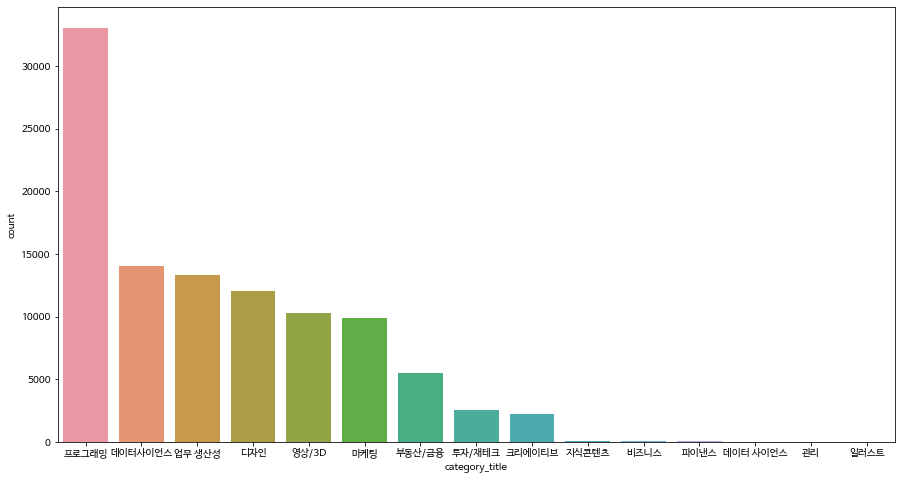

In [7]:
# 카테고리 별 강의 구매 횟수 시각화
fig = plt.figure(figsize=(15,8))
sns.countplot( data = df, x = 'category_title' , 
              order = df['category_title'].value_counts().index )

프로그래밍 관련 강의가 가장 많이 팔렸다.

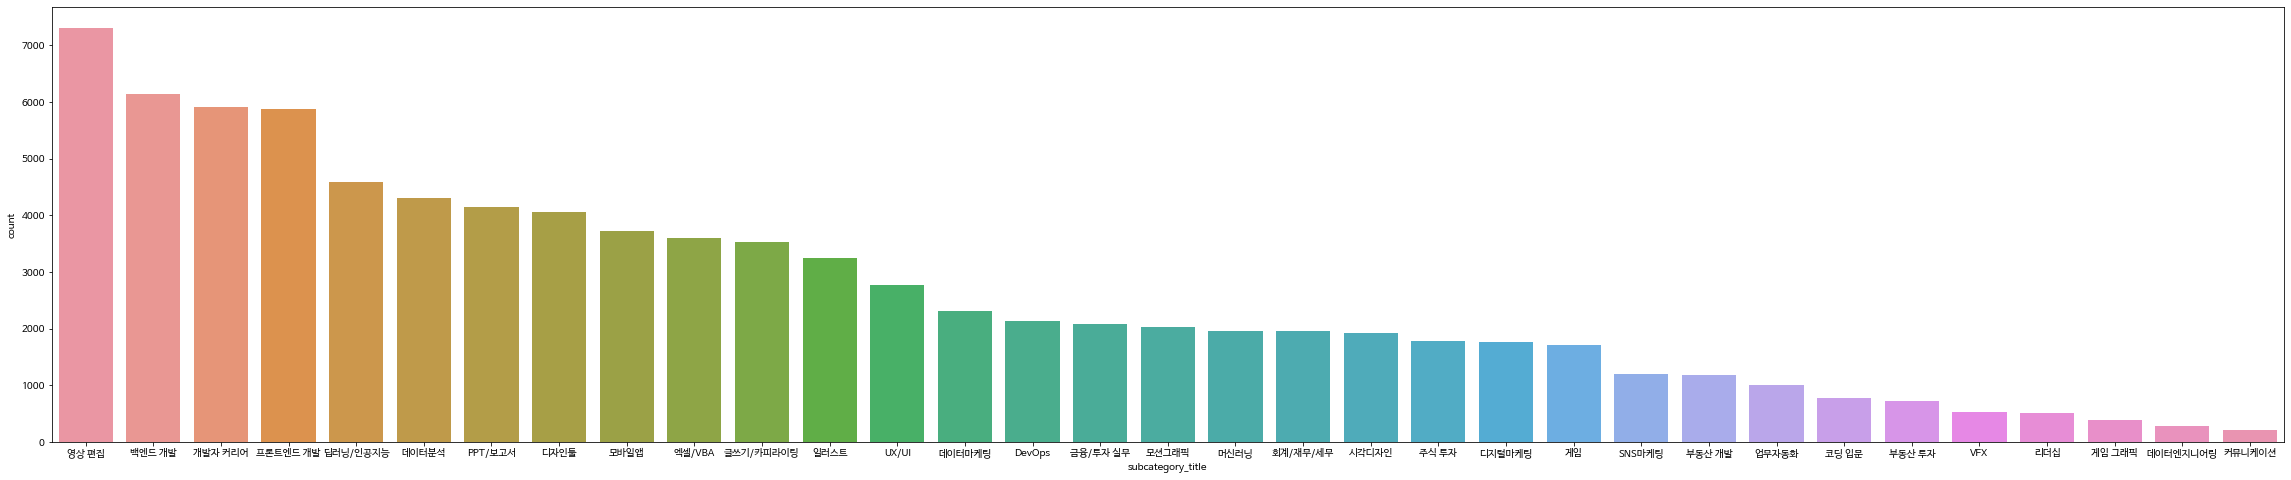

In [8]:
# 서브카테고리 별 강의 구매 횟수 시각화
fig = plt.figure(figsize=(40,8))
sns.countplot(data = df, x = "subcategory_title", 
              order = df['subcategory_title'].value_counts().index)

하지만 subcategory로 분류시 영상 편집 강의가 가장 많았다.

In [9]:
sub = df.groupby(['category_title', 'subcategory_title'])[['id']].count()
sub.head()

id
category_title subcategory_title      
데이터사이언스        데이터분석              4302
               데이터엔지니어링            275
               딥러닝/인공지능           4590
               머신러닝               1958
디자인            UX/UI              2775

In [ ]:
# 트리맵 해보기

In [10]:
# 카테고리 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

catr = df.groupby('category_title').agg(how)
catr = catr.sort_values('transaction_amount', ascending=False)
catr

,transaction_amount
category_title,
프로그래밍,3685366923
데이터사이언스,2154247670
디자인,1472061828
마케팅,1327429094
업무 생산성,1187949355
영상/3D,1097891580
부동산/금융,944512609
크리에이티브,671730027
투자/재테크,479614745


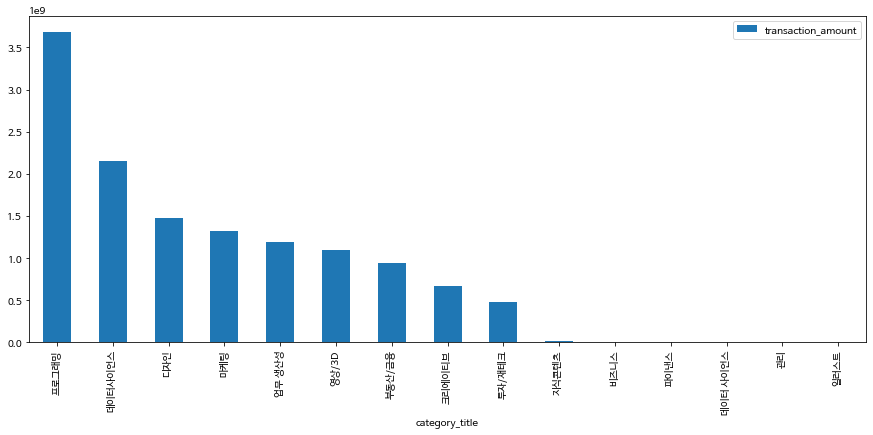

In [11]:
# 카테고리 별 총 수입 시각화
catr.plot.bar(figsize = (15,6))

수입이 높은 카테고리의 강의 종류, 광고 늘리기

##재구매 관련 데이터

In [12]:
# 한 사람이 강의를 몇 회 구매했는지 확인
df["customer_id"].value_counts() 

98685.0     78
50769.0     62
40783.0     59
496508.0    54
23171.0     51
            ..
545656.0     1
550306.0     1
550303.0     1
168905.0     1
610626.0     1
Name: customer_id, Length: 52178, dtype: int64

In [17]:
repeat = df.customer_id.value_counts().loc[df.customer_id.value_counts() >= 2]
repeat_index=repeat.index
repeat_index

Float64Index([ 98685.0,  50769.0,  40783.0, 496508.0,  23171.0, 427973.0,
              158374.0,  20784.0, 106662.0, 276705.0,
              ...
              403091.0, 639015.0, 605225.0, 519796.0, 113405.0,  48967.0,
              173849.0, 526243.0, 463248.0, 172581.0],
             dtype='float64', length=24765)

In [18]:
df["customer_id"].value_counts() >= 2

98685.0      True
50769.0      True
40783.0      True
496508.0     True
23171.0      True
            ...  
545656.0    False
550306.0    False
550303.0    False
168905.0    False
610626.0    False
Name: customer_id, Length: 52178, dtype: bool

In [19]:
# 재구매 시 True, 1회 구매시 False 인 column 생성
def repeat_order_func(x) :      

    if repeat_index.isin([x]).any()==True:
        return True
    else:
        return False

df['repeat_order'] = df['customer_id'].map(repeat_order_func)


In [20]:
df['repeat_order'].value_counts()

True     75517
False    27416
Name: repeat_order, dtype: int64

In [21]:
# 재구매자만 있는 데이터프레임
df_repeat_order = df[df.repeat_order.isin([True])]

In [22]:
# 강의를 1회만 구매한 사람 비율
re = df.customer_id.value_counts().loc[df.customer_id.value_counts() > 1]  

len(re)/len(df.customer_id.value_counts()) * 100

47.46253210165204

강의를 2회 이상 구매한 사람이 전체의 약47.5%

###쿠폰 사용

In [23]:
df['coupon_title'].count()

31779

In [24]:
# 강의 구매 시 쿠폰 사용 비율
print(df['coupon_title'].count()/(df['coupon_title'].count()+df['coupon_title'].isna().sum())*100)

30.87348080790417


In [27]:
# 쿠폰 할인율
df = df.fillna(0)
df['coupon_discount_rate'] = df['coupon_discount_amount']/(df['transaction_amount']+df['coupon_discount_amount'])*100

In [28]:
# 쿠폰 할인율 별 구분
def discount_rate(x) :   
    if x == 0:
        return "미사용"
    elif x < 10: 
        return "~10%"
    elif x < 20: 
        return "~20%"
    elif x < 30: 
        return "~30%"
    elif x < 40: 
        return "~40%"
    elif x < 50:
        return "~50%"
    elif x < 60: 
        return "~60%"
    elif x < 70: 
        return "~70%"       

df['coupon_discount_rate2'] = df['coupon_discount_rate'].map(discount_rate)

In [29]:
df['coupon_discount_rate'].value_counts()

0.000000      69947
100.000000     3486
20.000000      1598
30.000000      1007
10.000000       910
              ...  
67.938947         1
32.061053         1
99.869707         1
95.161290         1
25.062657         1
Name: coupon_discount_rate, Length: 3318, dtype: int64

In [30]:
df.coupon_discount_rate2.value_counts()

미사용     69947
~20%    16218
~10%     4560
~30%     1855
~40%     1146
~70%      608
~60%      370
~50%      245
Name: coupon_discount_rate2, dtype: int64

In [274]:
# 쿠폰 미사용자만 있는 데이터프레임
df_no_coupon = df[df.coupon_discount_rate2.isin(['미사용'])]
df_no_coupon

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,marketing_start_at,repeat_order,period,period_quartile,completed_month,completed_weekday,completed_day,Time,coupon_discount_rate,coupon_discount_rate2
67841,1189875,542837.0,201408.0,ORDER,CANCELLED,올인원 패키지 : 엑셀 실무 마스터,업무 생산성,올인원,2021-07-02 17:17:37,120500,...,2019-08-13,True,689 days 17:17:37,250일 초과,7월,금요일,2.0,17,0.0,미사용


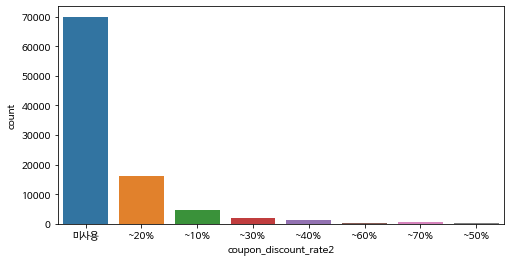

In [31]:
# 할인율 별 쿠폰 사용 횟수
fig = plt.figure(figsize=(8,4))                    
sns.countplot( data = df, x = 'coupon_discount_rate2')

In [221]:
# 재구매 시 쿠폰 사용 비율
print(df_repeat_order['coupon_title'].count()/(df_repeat_order['coupon_title'].count()+df_repeat_order['coupon_title'].isna().sum())*100)

29.349682852867566


In [235]:
# 사용 횟수 200회 이상인 쿠폰
df.coupon_title.value_counts().loc[df.coupon_title.value_counts() > 200]

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                              5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                             3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                              2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                             2325
[WELCOME] 온라인 강의 1만원 할인쿠폰                             1900
8월 1+1 프로모션 쿠폰                                        1458
4월 1+1 페이백 이벤트 쿠폰                                     1350
[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰                              1284
[미래투자금] 온라인 강의 2만원 할인쿠폰                               1274
5월 페이백 프로모션 쿠폰                                        1126
7월 100% 페이백 프로모션 쿠폰                                   1101
수강생 50만명 돌파 기념 감사제 쿠폰                                  875
[일주일한정] 플러스 친구 1만원 즉시할인 쿠폰                             601
[럭키룰렛] 올인원패키지                                          595
[웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰                               588
[미래투자금] 온라인 강의 1만원 할인쿠폰                                475
한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)     3

In [233]:
# 재구매 시 사용 횟수 200회 이상인 쿠폰
df_repeat_order.coupon_title.value_counts().loc[df_repeat_order.coupon_title.value_counts() > 200]

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰      4135
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰      1877
[WELCOME] 온라인 강의 3만원 할인쿠폰     1575
4월 1+1 페이백 이벤트 쿠폰             1261
[WELCOME] 온라인 강의 2만원 할인쿠폰     1214
8월 1+1 프로모션 쿠폰                1195
5월 페이백 프로모션 쿠폰                1066
[WELCOME] 온라인 강의 1만원 할인쿠폰     1056
[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰       998
7월 100% 페이백 프로모션 쿠폰            901
수강생 50만명 돌파 기념 감사제 쿠폰          574
[럭키룰렛] 올인원패키지                  521
[미래투자금] 온라인 강의 2만원 할인쿠폰        513
[웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰       471
[일주일한정] 플러스 친구 1만원 즉시할인 쿠폰     449
6월 반값특가 프로모션 쿠폰                232
[미래투자금] 온라인 강의 1만원 할인쿠폰        205
[20% 할인] 완주반 1주년 기념 쿠폰         203
Name: coupon_title, dtype: int64

재구매 시 쿠폰 사용 비율이 전체 쿠폰 사용 비율보다 적게 나온다.

재구매 시 사용할 수 있는 쿠폰을 여러 종류 발행한다면 강의를 재구매하는 사용자가 늘어나 매출이 증가 할 것으로 예상된다.

##환불 관련 데이터

In [36]:
# type 열에서 PAYMENT, REFUND 이외 제거 (나머지 데이터 의미 없음)
df_ORDER_delete = df[df.type.isin(['PAYMENT', 'REFUND'])]  
df_ORDER_delete.head(2)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,repeat_order,coupon_discount_rate,coupon_discount_rate2
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.0,190900.0,190900.0,0,CARD,0,2021-03-04 00:00:00,True,10.000000,~20%
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000.0,117500.0,117500.0,0,CARD,PPT/보고서,2019-11-14 00:00:00,True,17.021277,~20%


In [37]:
# 결제, 환불 value_counts
df_ORDER_delete['type'].value_counts()

PAYMENT    59437
REFUND      3642
Name: type, dtype: int64

In [38]:
# 환불율
print(f'{"%0.4f"%(3824/(3824+61433)*100)}%')

5.8599%


In [39]:
# 환불 0% 시 매출 상승률
print(f'{"%0.4f"%(100/(100-5.86)*100)}%')

106.2248%


환불 문제 해결 시 약 6%의 매출 상승을 기대할 수 있다.

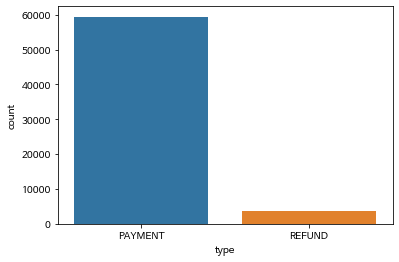

In [34]:
# 결제, 환불 count
fig = plt.figure(figsize=(6,4)) 
sns.countplot(data = df_ORDER_delete, x = "type", order = df_ORDER_delete['type'].value_counts().index)

In [44]:
# 판매 시작일로부터 강의 구매일 사이의 기간 (판매 시작일이 없는 값 제외)
df_period = df[df.marketing_start_at.isin([0])==False]
df_period['period'] = df_period['completed_at'] - df_period['marketing_start_at']
df_period.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1190: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,repeat_order,coupon_discount_rate,coupon_discount_rate2,period
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,116000.0,116000.0,0,CARD,영상 편집,2020-12-02 00:00:00,False,0.000000,미사용,116 days 15:16:53
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,0,CARD,0,2021-03-04 00:00:00,True,10.000000,~20%,24 days 15:21:43
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,0,CARD,0,2021-03-04 00:00:00,True,0.000000,미사용,24 days 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,117500.0,0,CARD,PPT/보고서,2019-11-14 00:00:00,True,17.021277,~20%,500 days 15:21:54
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,...,117500.0,117500.0,0,CARD,PPT/보고서,2019-11-14 00:00:00,True,0.000000,미사용,500 days 15:21:56


In [45]:
df_period['period'].describe()

count                          87439
mean     180 days 22:49:56.259666742
std      203 days 07:49:05.552178538
min                -7 days +04:12:20
25%                 30 days 15:05:52
50%                101 days 12:51:54
75%                250 days 22:15:17
max                950 days 16:45:00
Name: period, dtype: object

In [46]:
# 판매 시작일로부터 강의 구매일 사이의 기간 4분위로 구분
def func(x) :                                     

    if x <= datetime.timedelta(days=30): 
        return "~30일"
    elif x <= datetime.timedelta(days=101):
        return "~101일"
    elif x <= datetime.timedelta(days=250):
        return "~250일"
    else:
        return "250일 초과"


df_period['period_quartile'] = df_period['period'].map(func)
df_period['period_quartile'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1      ~250일
2       ~30일
3       ~30일
4    250일 초과
5    250일 초과
Name: period_quartile, dtype: object

In [47]:
# type이 환불인 데이터만 
df_refund = df_period[df_period.type=='REFUND']
df_refund.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,tax_free_amount,pg,method,subcategory_title,marketing_start_at,repeat_order,coupon_discount_rate,coupon_discount_rate2,period,period_quartile
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,...,116000.0,0,CARD,영상 편집,2020-12-02 00:00:00,False,-0.0,미사용,117 days 09:26:13,~250일
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,...,89000.0,0,CARD,일러스트,2021-02-19 00:00:00,False,-0.0,미사용,38 days 09:40:54,~101일
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,...,340000.0,0,VBANK,0,2021-03-08 00:00:00,False,-0.0,미사용,21 days 09:44:01,~30일
676,972440,469406.0,202547.0,REFUND,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-03-29 09:48:29,-125000,...,145000.0,0,CARD,금융/투자 실무,2020-04-17 00:00:00,False,-0.0,미사용,346 days 09:48:29,250일 초과
701,972518,456206.0,203787.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 디자인 툴,디자인,올인원,2021-03-29 10:10:53,-140000,...,170000.0,0,CARD,디자인툴,2020-12-24 11:00:00,False,-0.0,미사용,94 days 23:10:53,~101일


In [ ]:
# 판매 시작일로부터 강의 구매일 사이의 기간 4분위 별 환불 횟수
fig = plt.figure(figsize=(15,8))                    
sns.countplot( data = df_refund, x = 'period_quartile' , 
              order = df_refund['period_quartile'].value_counts().index )

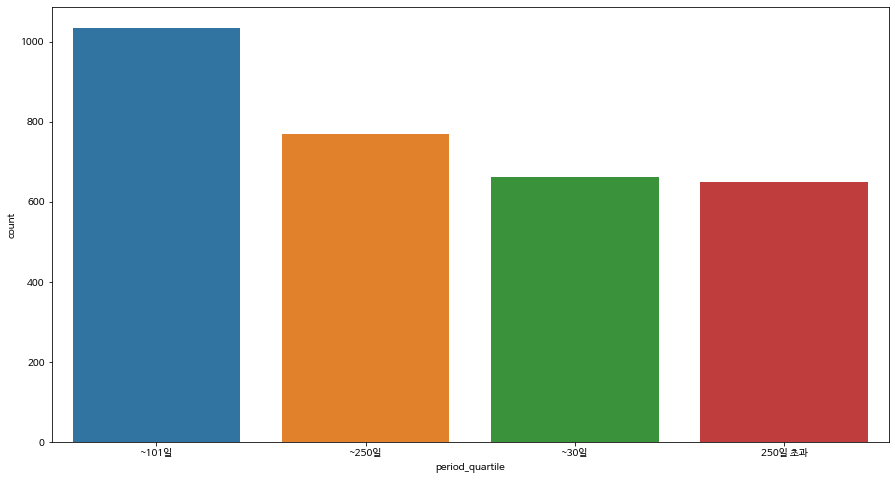

In [48]:
# 판매 시작일로부터 강의 구매일 사이의 기간 4분위 별 환불 횟수
fig = plt.figure(figsize=(15,8))                    
sns.countplot( data = df_refund, x = 'period_quartile' , 
              order = df_refund['period_quartile'].value_counts().index )

판매 시작한지 250일 초과된 데이터의 환불 횟수가 가장 크게,
30일 이하인 데이터가 가장 적게 나타났다.

-> 판매 시작한지 오래된 강의들을 재편성

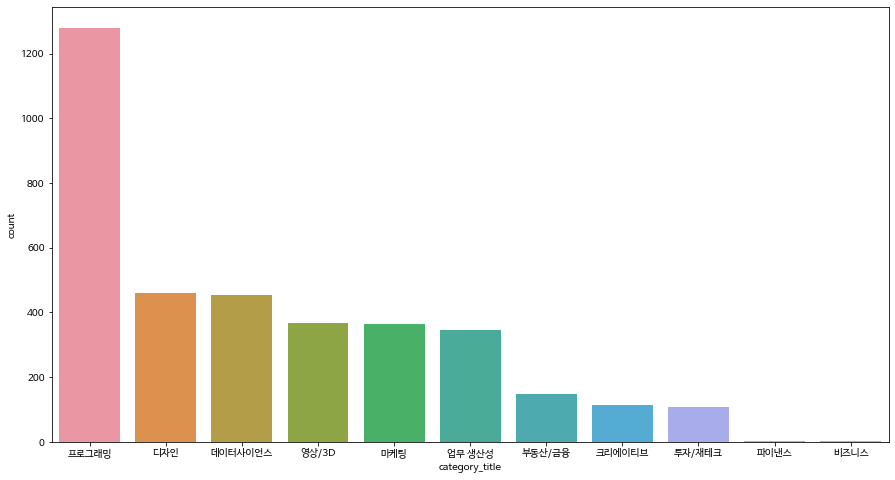

In [148]:
# 카테고리 별 환불 횟수
fig = plt.figure(figsize=(15,8))
sns.countplot( data = df_refund, x = 'category_title' , 
              order = df_refund['category_title'].value_counts().index )

In [149]:
# 카테고리 별 환불 비율
df_refund_rate=df_refund['category_title'].value_counts()/df_ORDER_delete['category_title'].value_counts()*100 
df_refund_rate = df_refund_rate.sort_values(ascending=False)
df_refund_rate

크리에이티브      10.531221
파이낸스         8.333333
마케팅          6.362210
프로그래밍        6.220235
디자인          6.124083
비즈니스         5.882353
영상/3D        5.631636
데이터사이언스      5.455202
투자/재테크       5.376884
업무 생산성       4.417773
부동산/금융       4.276221
관리                NaN
데이터 사이언스          NaN
지식콘텐츠             NaN
Name: category_title, dtype: float64

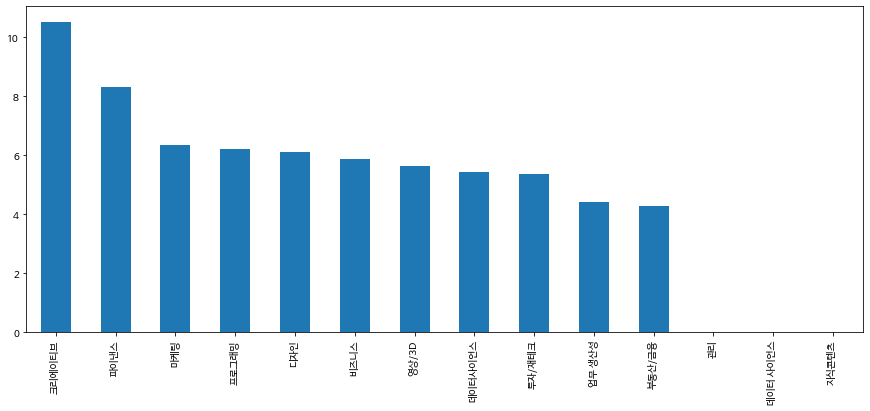

In [150]:
# 카테고리 별 환불 비율 그래프
df_refund_rate.plot.bar(figsize = (15,6)) 

환불 비율이 높은 카테고리의 강의의 질 높이기

##결제 시기에 따른 데이터

In [151]:
df['completed_at'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  102933
unique                  96415
top       2021-08-27 15:17:38
freq                       22
first     2021-03-28 15:00:11
last      2021-09-25 14:25:47
Name: completed_at, dtype: object

In [152]:
# 결제 월 컬럼 추가
def func(x) :                                     

    if datetime.date(2021,4,1) <= x < datetime.date(2021,5,1):   # 3월은 28일부터, 9월은 25일까지밖에 없으므로 제외
        return "4월"
    elif datetime.date(2021,5,1) <= x < datetime.date(2021,6,1):
        return "5월"
    elif datetime.date(2021,6,1) <=  x < datetime.date(2021,7,1):
        return "6월"
    elif datetime.date(2021,7,1) <=  x < datetime.date(2021,8,1):
        return "7월"
    elif datetime.date(2021,8,1) <= x < datetime.date(2021,9,1):
        return "8월"

df['completed_month'] = df['completed_at'].map(func)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  
/usr/local/lib/python3.7/di

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,repeat_order,period,period_quartile,completed_month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,False,NaT,250일 초과,None
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,False,116 days 15:16:53,~250일,None
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,True,24 days 15:21:43,~30일,None
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,True,24 days 15:21:43,~30일,None
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,True,500 days 15:21:54,250일 초과,None


In [153]:
# 월 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

month_account = df.groupby('completed_month').agg(how)
month_account = month_account.sort_values('transaction_amount', ascending=False)

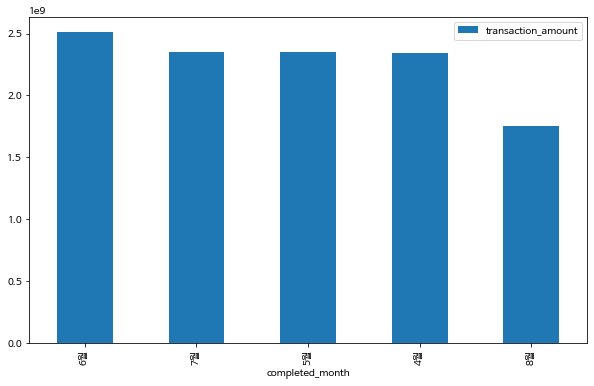

In [154]:
# 월 별 총 수입 그래프
month_account.plot.bar(figsize = (10,6)) 

In [155]:
def weekdays(x) :           
    if x.weekday() == 0: 
        return "월요일"
    elif x.weekday() == 1: 
        return "화요일"
    elif x.weekday() == 2: 
        return "수요일"
    elif x.weekday() == 3: 
        return "목요일"
    elif x.weekday() == 4: 
        return "금요일"
    elif x.weekday() == 5: 
        return "토요일"
    elif x.weekday() == 6: 
        return "일요일"        

df['completed_weekday'] = df['completed_at'].map(weekdays)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,tax_free_amount,pg,method,subcategory_title,marketing_start_at,repeat_order,period,period_quartile,completed_month,completed_weekday
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,110500.0,NaN,VBANK,개발자 커리어,NaT,False,NaT,250일 초과,None,일요일
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,116000.0,NaN,CARD,영상 편집,2020-12-02,False,116 days 15:16:53,~250일,None,일요일
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,NaN,CARD,NaN,2021-03-04,True,24 days 15:21:43,~30일,None,일요일
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,NaN,CARD,NaN,2021-03-04,True,24 days 15:21:43,~30일,None,일요일
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,NaN,CARD,PPT/보고서,2019-11-14,True,500 days 15:21:54,250일 초과,None,일요일


In [156]:
# 요일 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

weekday_account = df.groupby('completed_weekday').agg(how)
weekday_account = weekday_account.sort_values('transaction_amount', ascending=False)

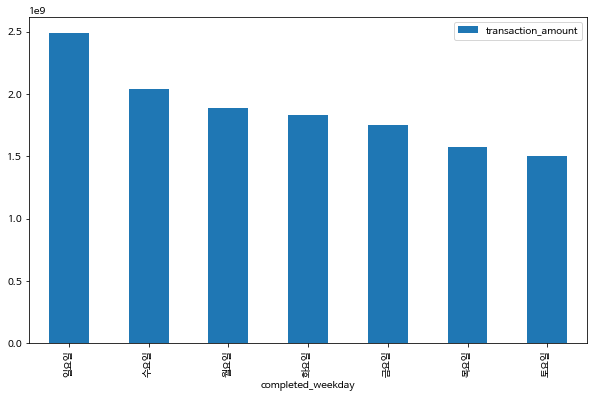

In [159]:
# 요일 별 총 수입 그래프
weekday_account.plot.bar(figsize = (10,6)) 

In [158]:
x = datetime.date(2021,4,10)
x.day

10

In [160]:
# 결제 일 컬럼 추가
def days(x) :  
    if x < datetime.date(2021,4,1) or x >= datetime.date(2021,9,1):     # 3월은 28일부터, 9월은 25일까지밖에 없으므로 제외
        return None
    else:          
        return x.day
    

df['completed_day'] = df['completed_at'].map(days)
df.loc[12000, 'completed_day']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


11.0

In [161]:
# 일 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

day_account = df.groupby('completed_day').agg(how)
day_account = day_account.sort_values('transaction_amount', ascending=False)

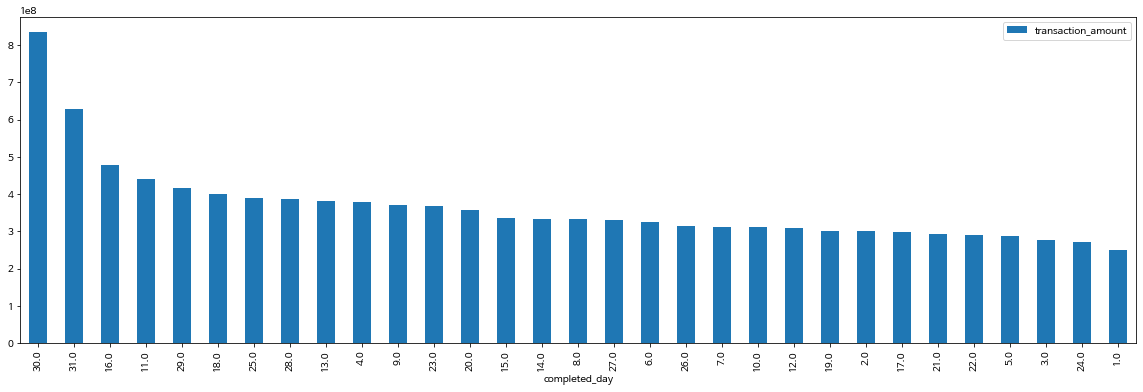

In [162]:
# 일 별 총 수입 그래프
day_account.plot.bar(figsize = (20,6)) 

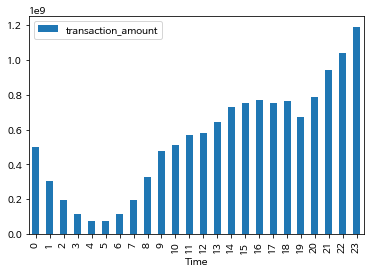

In [240]:
df['Time']=  df['completed_at'].dt.hour
time_account = df.groupby('Time').agg(how)
time_account.plot.bar()


방학시즌인 6,7월, 주말인 일요일, 월말인 30,31일, 그리고 하루의 마지막인 20~23시에 수입이 높게 나타난다.

  ->  매출 높은 시기에 광고 늘리기

In [164]:
# 월 말에 가장 잘 팔리는 강의 카테고리
